In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
data=data[data.cuisines.isna()==False]

In [7]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7741
votes                              0
phone                           1179
location                           0
rest_type                        206
dish_liked                     28033
cuisines                           0
approx_cost(for two people)      320
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51672 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51672 non-null  object
 1   address                      51672 non-null  object
 2   name                         51672 non-null  object
 3   online_order                 51672 non-null  object
 4   book_table                   51672 non-null  object
 5   rate                         43931 non-null  object
 6   votes                        51672 non-null  int64 
 7   phone                        50493 non-null  object
 8   location                     51672 non-null  object
 9   rest_type                    51466 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51352 non-null  object
 13  reviews_list                 51

In [9]:
data.drop(columns=["url", 'address','phone','listed_in(city)'], inplace  =True)

In [10]:
data.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [11]:
data.rename(columns={'listed_in(type)': 'listed_type'}, inplace=True)

In [12]:
data.name.value_counts().head()

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Name: name, dtype: int64

Text(0.5, 1.0, 'Name vs Number of Restaurant')

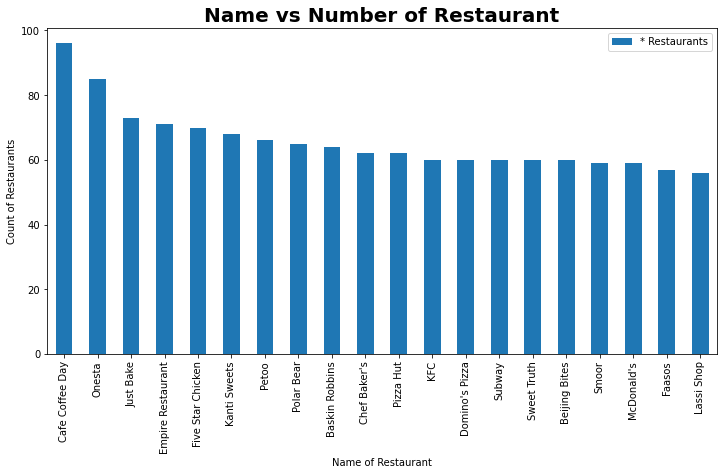

In [13]:
plt.figure(figsize = (12,6))
ax = data.name.value_counts()[:20].plot(kind = 'bar')
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Name vs Number of Restaurant",fontsize =20, weight = 'bold')

In [14]:
data.online_order.value_counts()

Yes    30428
No     21244
Name: online_order, dtype: int64

Text(0.5, 0, 'online orders')

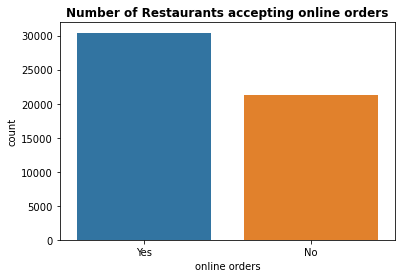

In [16]:
import warnings
warnings.filterwarnings('ignore')
ax= sns.countplot(data['online_order'])
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')

In [17]:
data['book_table'].value_counts()

No     45223
Yes     6449
Name: book_table, dtype: int64

Text(0, 0.5, 'No of restaurants')

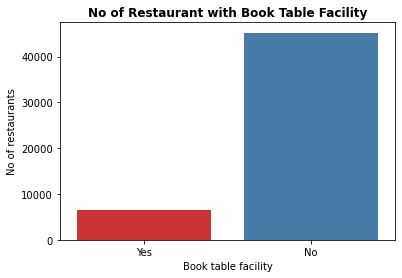

In [18]:
sns.countplot(data['book_table'], palette= "Set1")
plt.title("No of Restaurant with Book Table Facility", weight = 'bold')
plt.xlabel('Book table facility')
plt.ylabel('No of restaurants')

In [19]:
data['location'].value_counts()[:10]

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2233
Whitefield               2136
Indiranagar              2081
Jayanagar                1926
Marathahalli             1843
Bannerghatta Road        1630
Bellandur                1286
Name: location, dtype: int64

Text(0.5, 1.0, 'Location')

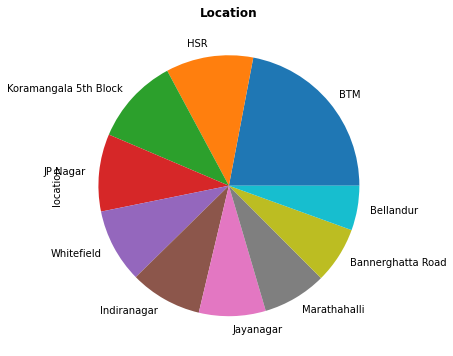

In [20]:
plt.figure(figsize=(12,6)) 
data['location'].value_counts()[:10].plot(kind = 'pie')
plt.title('Location', weight = 'bold')

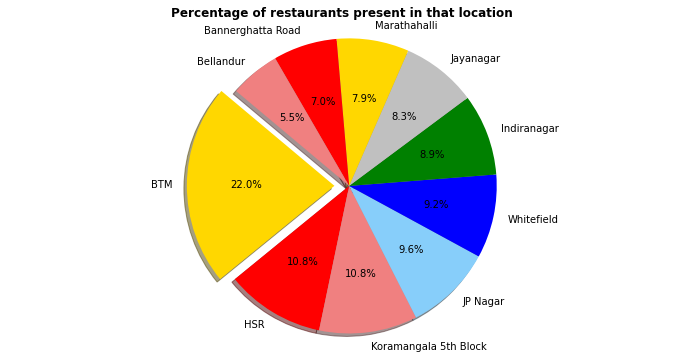

In [21]:
plt.figure(figsize = (12,6))
names = data['location'].value_counts()[:10].index
values = data['location'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that location", weight = 'bold')
plt.show()

Text(0.5, 1.0, 'Location vs Count')

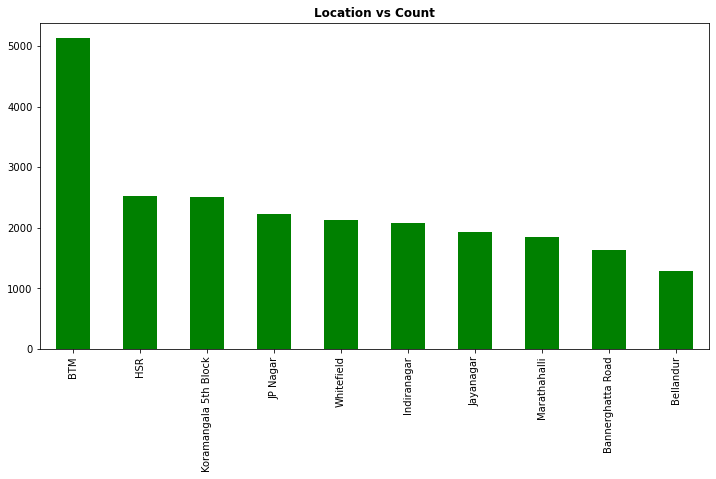

In [22]:
plt.figure(figsize = (12,6))
data['location'].value_counts()[:10].plot(kind = 'bar', color = 'g')
plt.title("Location vs Count", weight = 'bold')

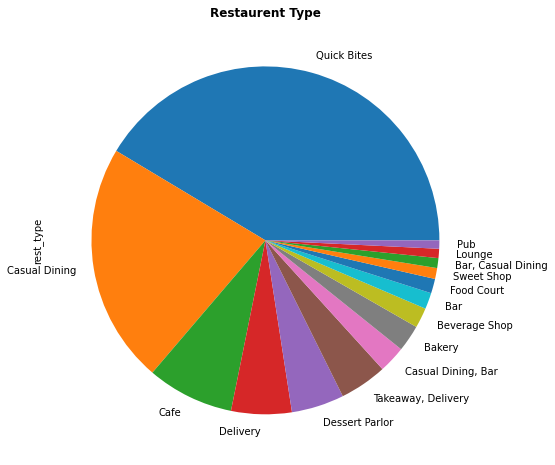

In [23]:
plt.figure(figsize = (14,8))
data.rest_type.value_counts()[:15].plot(kind = 'pie')
plt.title('Restaurent Type', weight = 'bold')
plt.show()

In [24]:
colors = ['#800080','red','#00FFFF','#FFFF00','#00FF00','#FF00FF']

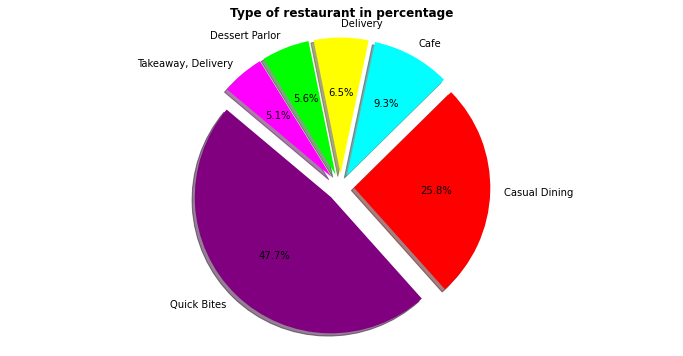

In [25]:
plt.figure(figsize = (12,6))
names = data['rest_type'].value_counts()[:6].index
values = data['rest_type'].value_counts()[:6].values
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)  # explode 1st slice

plt.title('Type of restaurant in percentage', weight = 'bold')
plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [26]:
data['average_cost'].value_counts()[:20]

300      7576
400      6554
500      4977
200      4855
600      3712
250      2959
800      2285
150      2064
700      1948
350      1763
1,000    1637
450      1417
1,200     993
100       991
1,500     971
650       776
550       761
750       758
900       700
1,300     516
Name: average_cost, dtype: int64

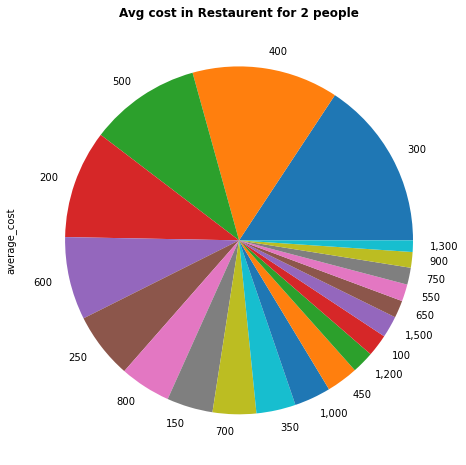

In [27]:
plt.figure(figsize = (12,8))
data['average_cost'].value_counts()[:20].plot(kind = 'pie')
plt.title('Avg cost in Restaurent for 2 people', weight = 'bold')
plt.show()

In [28]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5, 1.0, 'Average cost for 2 people in Rupees')

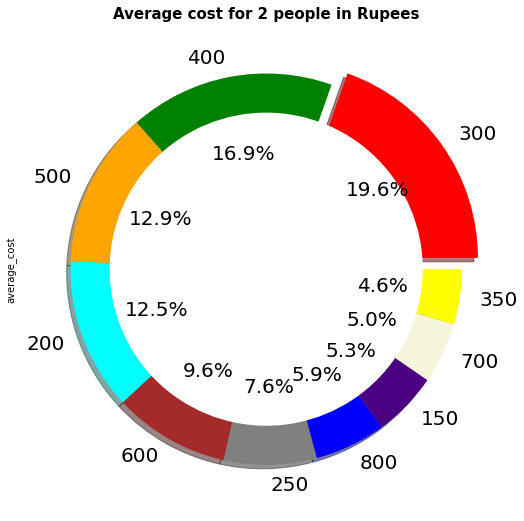

In [30]:
fig= plt.figure(figsize=(18, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['average_cost'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')


In [31]:
dishes_data = data[data.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

In [32]:
dishes_data.isnull().sum()

name              0
online_order      0
book_table        0
rate             30
votes             0
location          0
rest_type        70
dish_liked        0
cuisines          0
average_cost    136
reviews_list      0
menu_item         0
listed_type       0
dtype: int64

In [33]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in dishes_data.dish_liked:
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

Text(0, 0.5, 'Count')

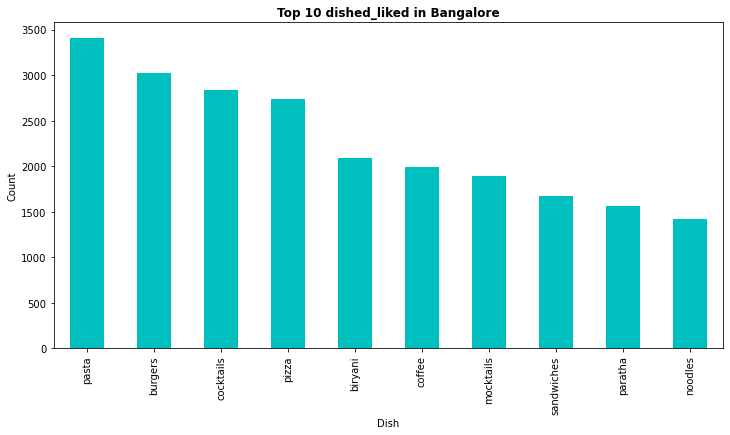

In [34]:
plt.figure(figsize=(12,6)) 
pd.Series(dish_count).value_counts()[:10].plot(kind='bar',color= 'c')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

In [35]:
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [36]:
data['rate'] = data.loc[:,'rate'].replace('[ ]','',regex = True)
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].apply(lambda r: r.replace('/5',''))
data['rate'] = data['rate'].apply(lambda r: float(r))

3.9058343007007914


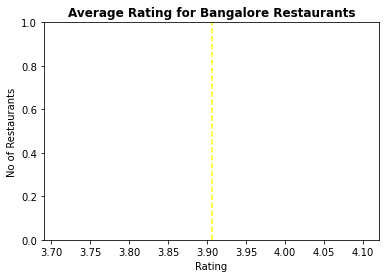

In [37]:
plt.axvline(x= data.rate.mean(),ls='--',color='yellow')
plt.title('Average Rating for Bangalore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.rate.mean())

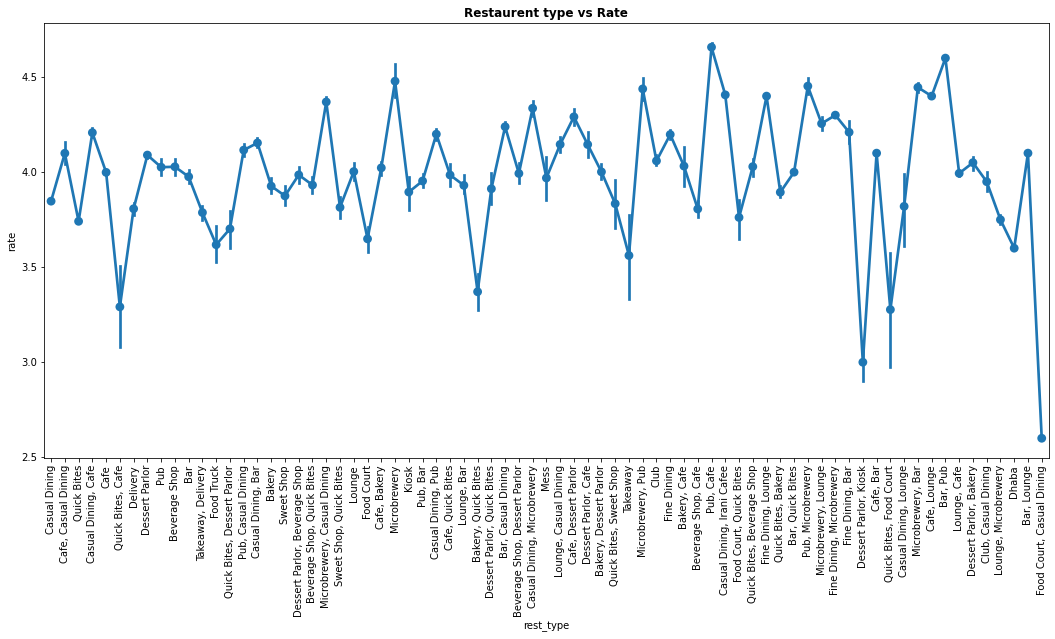

In [38]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=data["rest_type"], y=data["rate"], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

In [39]:
#lets delete the nulll values
cuisines_data = data[data.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

In [40]:
cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

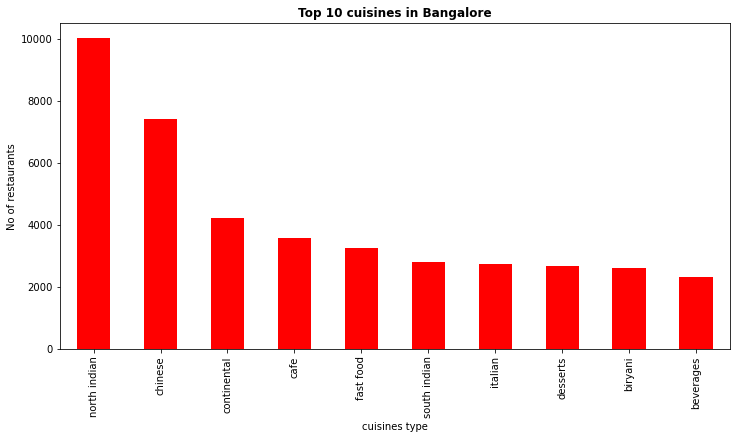

In [41]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

Text(0.5, 1.0, 'rate vs oline order')

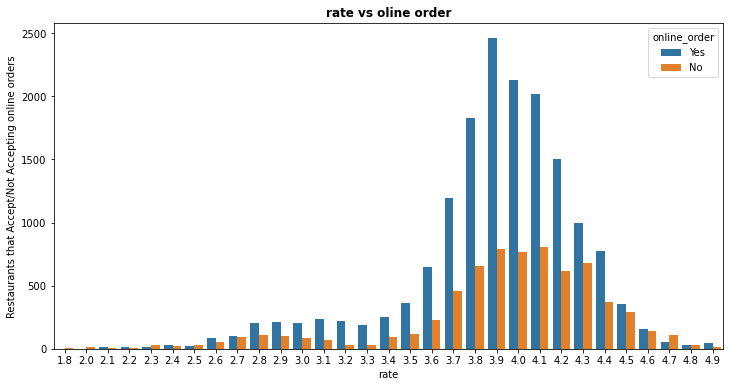

In [42]:
plt.figure(figsize = (12,6))
sns.countplot(x=data['rate'], hue = data['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')

In [43]:
data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_type
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,1,1,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200","[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars
51707,M Bar - Bengaluru Marriott Hotel Whitefield,0,0,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars
51708,Keys Cafe - Keys Hotel,0,0,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars
51711,Bhagini,0,0,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars


In [44]:
data.drop(columns=['dish_liked','reviews_list','menu_item','listed_type'], inplace  =True)

In [45]:
data['rest_type'] = data['rest_type'].str.replace(',' , '') 
data['rest_type'] = data['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['rest_type'].value_counts().head()

Casual Dining        7331
Bites Quick          5253
Cafe                 2375
Bar Casual Dining    1321
Dessert Parlor       1083
Name: rest_type, dtype: int64

In [46]:
data['cuisines'] = data['cuisines'].str.replace(',' , '') 
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()

Indian North                         1152
Chinese Indian North                  852
Chinese Indian Indian North South     455
Indian South                          366
Cream Desserts Ice                    334
Name: cuisines, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()                 
data['location'] = T.fit_transform(data['location'])
data['rest_type'] = T.fit_transform(data['rest_type'])
data['cuisines'] = T.fit_transform(data['cuisines'])
#data['dish_liked'] = T.fit_transform(data['dish_liked'].

In [48]:
data["average_cost"] = data["average_cost"].str.replace(',' , '')

In [49]:
data["average_cost"] = data["average_cost"].astype('float')

In [50]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,4.1,775,1,29,951,800.0
1,Spice Elephant,1,0,4.1,787,1,29,963,800.0
2,San Churro Cafe,1,0,3.8,918,1,22,806,800.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,19,1201,300.0
4,Grand Village,0,0,3.8,166,4,29,1237,600.0


In [51]:
x = data.drop(['rate','name'],axis = 1)

In [52]:
y = data['rate']

In [53]:
x.shape , y.shape

((23259, 7), (23259,))

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 33)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23259 entries, 0 to 51715
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23259 non-null  object 
 1   online_order  23259 non-null  uint8  
 2   book_table    23259 non-null  uint8  
 3   rate          23259 non-null  float64
 4   votes         23259 non-null  int64  
 5   location      23259 non-null  int32  
 6   rest_type     23259 non-null  int32  
 7   cuisines      23259 non-null  int32  
 8   average_cost  23259 non-null  float64
dtypes: float64(2), int32(3), int64(1), object(1), uint8(2)
memory usage: 1.7+ MB


In [56]:
#standarizing
#taking numeric values
from sklearn.preprocessing import StandardScaler
num_values1=data.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(data[num_values1])
data[num_values1]=scaler.transform(data[num_values1])

In [57]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,0.455722,0.152328,1,29,951,0.089176
1,Spice Elephant,1,0,0.455722,0.163105,1,29,963,0.089176
2,San Churro Cafe,1,0,-0.248401,0.280757,1,22,806,0.089176
3,Addhuri Udupi Bhojana,0,0,-0.483109,-0.464668,1,19,1201,-0.871467
4,Grand Village,0,0,-0.248401,-0.394616,4,29,1237,-0.295081


In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [59]:
lr.score(X_test, y_test)*100

21.31919729540205

In [60]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error: 0.2653603458127483
Mean Squared Error: 0.1377346289755432
Root Mean Squared Error: 0.3711261631514857


In [61]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test,y_test)*100

92.0706940169523

In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))

Mean Absolute Error: 0.0450014717461886
Mean Squared Error: 0.013880641529662575
Root Mean Squared Error: 0.11781613441996208


In [63]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)

In [64]:
rdg.score(X_test,y_test)*100

21.319272304070157

In [65]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rdg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rdg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rdg)))

Mean Absolute Error: 0.26535785924489913
Mean Squared Error: 0.1377344976691671
Root Mean Squared Error: 0.3711259862488305


In [66]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [67]:
ls.score(X_test,y_test)*100

18.268849267687692

In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ls))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ls))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ls)))

Mean Absolute Error: 0.26860412543057505
Mean Squared Error: 0.14307441376931176
Root Mean Squared Error: 0.37825178620769495


In [69]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)

In [70]:
sv.score(X_test,y_test)*100

27.192449709207665

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_sv))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_sv))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_sv)))

Mean Absolute Error: 0.23551657182398086
Mean Squared Error: 0.12745321070973847
Root Mean Squared Error: 0.35700589730386595


In [72]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train, y_train)  #fit the model
    y_pred_knn=knn.predict(X_test) #make prediction on test set

In [73]:
knn.score(X_test,y_test)*100

46.5404892317514

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

Mean Absolute Error: 0.2136328460877042
Mean Squared Error: 0.0935835124677558
Root Mean Squared Error: 0.3059142240363396
